## K-mean clustering on Iris Dataset

Iris dataset: 

Fisher's Iris data set is a multivariate data set that has been introduced by Ronald Fischer, British statistician and biologist. 

The data set has 50 samples from each of three Iris species (Iris setosa, Iris virginica and Iris versicolor). There are four features measured from each sample: the length and the width of the sepals and petals and their values are provided in centimeters.

In [2]:
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Let us import Iris dataset csv and examine its features.

In [4]:
data = pd.read_csv('data/IRIS.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


We see that we have 150 rows of data, five features/columns. Four are float values and one is an object value. There are no NaN values. From the data we see that feature Species will be our output/cluster so it is interesting to see number of unique values or number of clusters in this column.

In [25]:
data["species"].value_counts(normalize=True)

Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: species, dtype: float64

In [41]:
x = data.iloc[:, [0, 1, 2, 3]].values

There are three unique values of species: Iris-setosa, Iris-versicolor and Iris-virginica. We are goint to store them in three different dataframes.

In [26]:
iris_setosa=data.loc[data["species"]=="Iris-setosa"]
iris_virginica=data.loc[data["species"]=="Iris-virginica"]
iris_versicolor=data.loc[data["species"]=="Iris-versicolor"]

Next we are going to see their distribution with histograms according to other features.

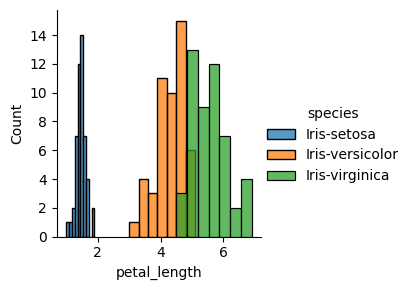

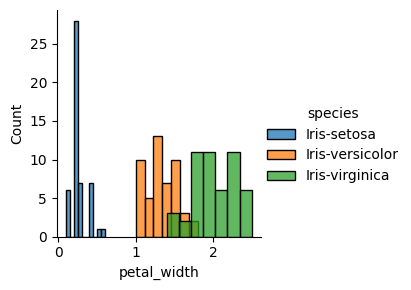

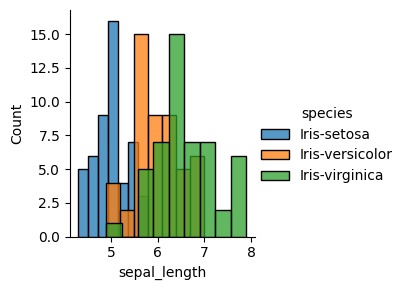

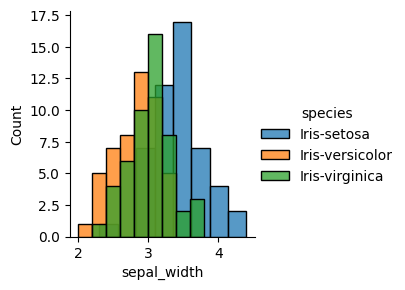

In [34]:
sns.FacetGrid(data,hue="species",height=3).map(sns.histplot,"petal_length").add_legend()
sns.FacetGrid(data,hue="species",height=3).map(sns.histplot,"petal_width").add_legend()
sns.FacetGrid(data,hue="species",height=3).map(sns.histplot,"sepal_length").add_legend()
sns.FacetGrid(data,hue="species",height=3).map(sns.histplot,"sepal_width").add_legend()

plt.show()

c:\Users\WWTDev - Zinaid\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


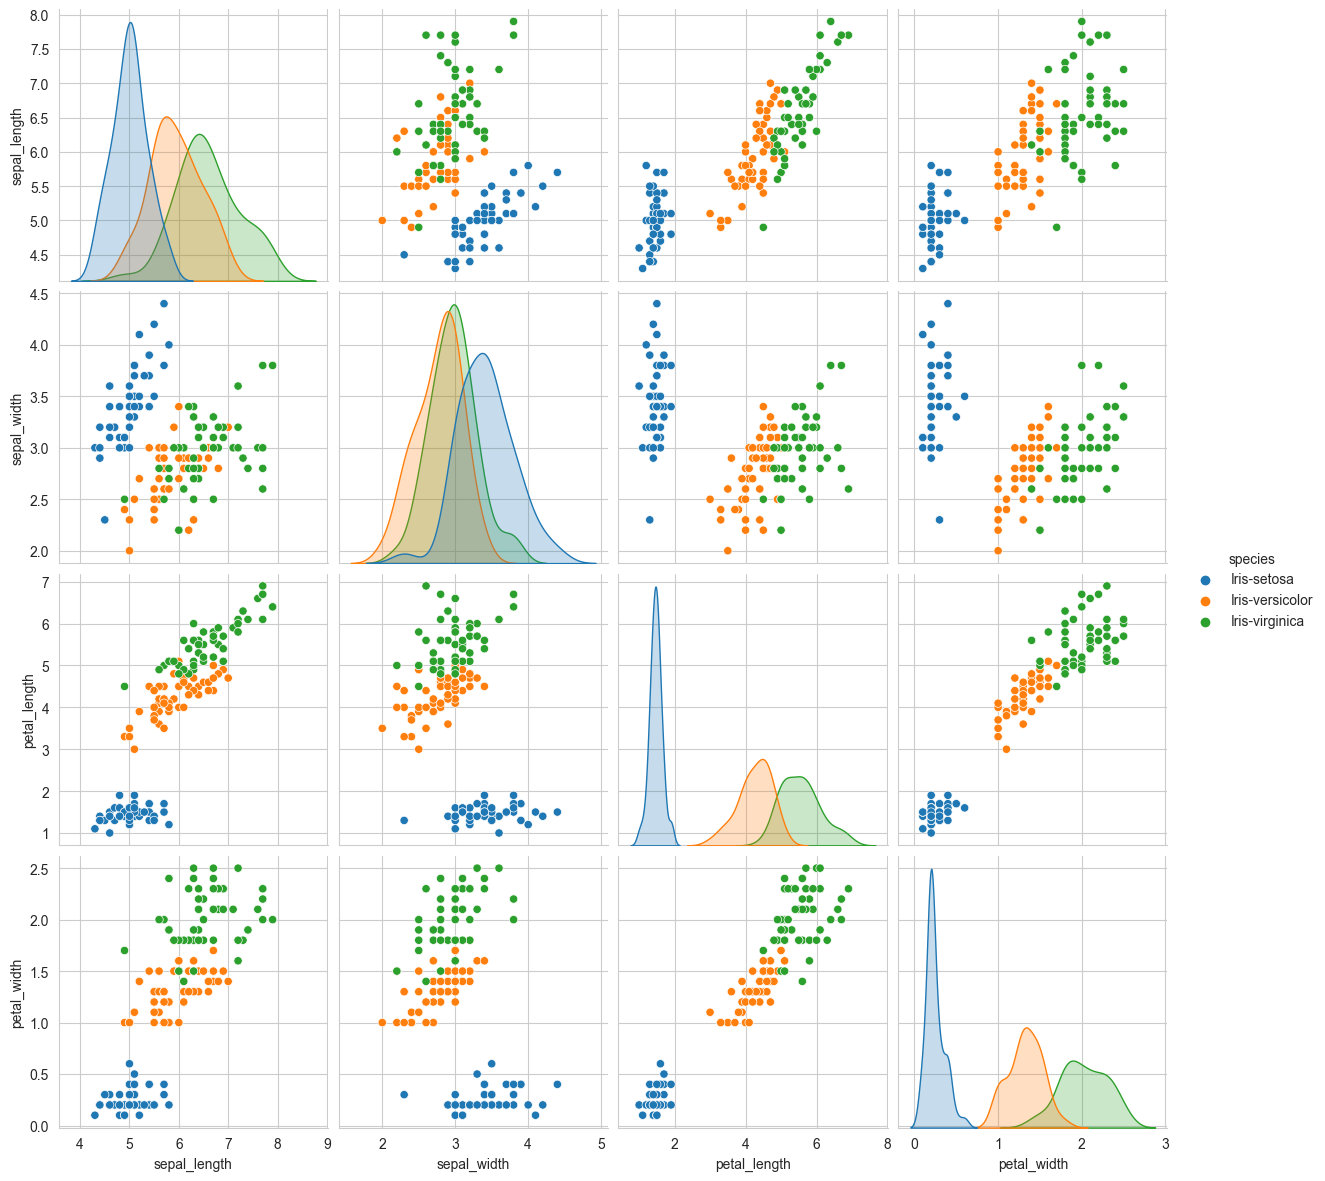

In [35]:
sns.set_style("whitegrid")
sns.pairplot(data,hue="species",height=3);
plt.show()

Now we are going to implement K-mean algorithm for clustering of this data. K-mean algorithm is implemented in these steps:
* 1 Decide the number of clusters
* 2 Select k random points as centroids
* 3 Assign all the points to the closest cluster centroid
* 4 Recompute the centroids of newly formed clusters
* 5 Repeat steps 3 and 4

In [36]:
from sklearn.cluster import KMeans

In [42]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

We can find the number of clusters with an elbow method.

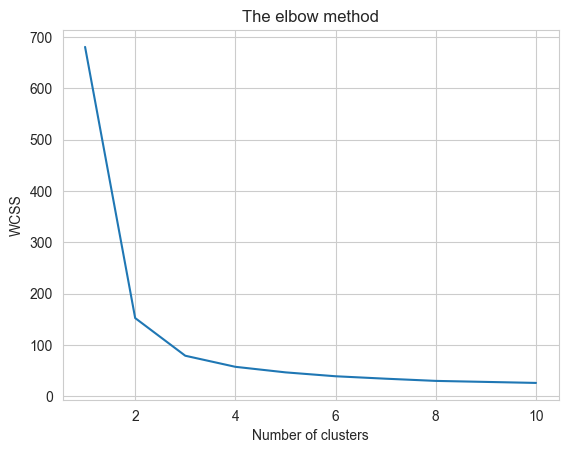

In [43]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [44]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

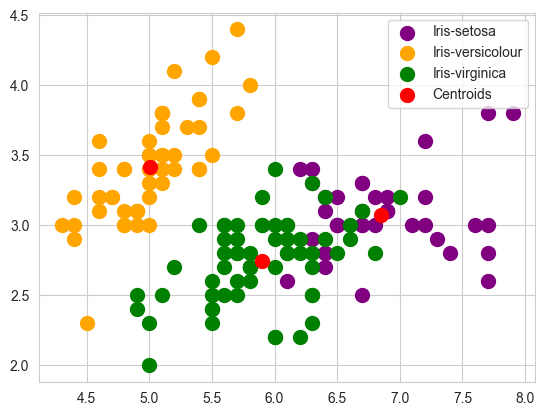

In [46]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()